# Predicting Credit Card Fraud


The goal for this analysis is to predict credit card fraud in the transactional data. Fraud data is very highly skewed data that is, overwhelming majority of the data is one class and the rest is the other class. If we try to predict the majority class, the overall accuracy may be high but we may completely miss the other class that is, the fraud transactions here. 
I am using tensorflow to build the predictive model, and then t-SNE to visualize the dataset in two dimensions. See references for the detail help taken in this analysis.

The sections of this analysis include:

*  Exploring the Data  
*  Building the Neural Network  
    * FC network with Tensorflow
    * FC network with Keras
    * Autoencoder network with Keras: ** detects Fraud transaction**
*  Visualizing the Data with t-SNE.

### 0. Import and load

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
# from show_confusion_matrix import show_confusion_matrix 
# the above is from http://notmatthancock.github.io/2015/10/28/confusion-matrix.html

In [2]:
df = pd.read_csv("creditcard.csv")

### 1. Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

We have time of transaction, 28 anonimyzed features, amount of transaction and the class of transaction in the dataset. 

Let us have a look at the first few rows of the dataset and the basic stats of each column.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There is no missing values, that makes things a little easier for us as we don't have to impute any column.

### Target "Class" column

As we understand, the last column "Class" indicates if the transaction is fraud (=1) or not (=0). Let us have a look at the Class column.

In [7]:
count_classes = pd.DataFrame(pd.value_counts(df['Class'], sort = True).sort_index())
count_classes

,Class
0,284315
1,492


Fraud transactions are only 492/(492+284315) = 0.1727% of total transactions.

### Fraud and normal transaction vs. time

Let's see how time compares across fraudulent and normal transactions.

In [21]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


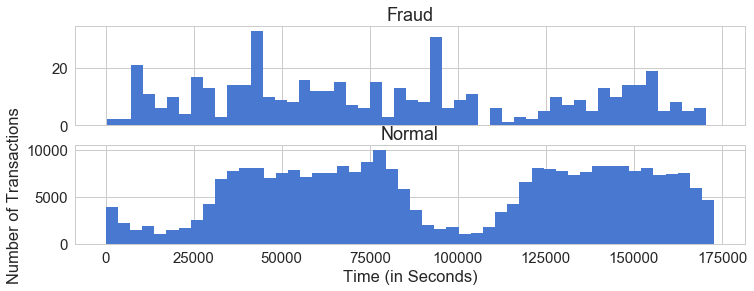

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

**Fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution**. Number of normal transactions is much smaller during the weee hours of the morning (between 1 to 5am). This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.



### Fraud and normal transaction vs. amount
#### Threshold for normal/fraud transaction

Now let's see if the transaction amount differs between the two types.

In [23]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


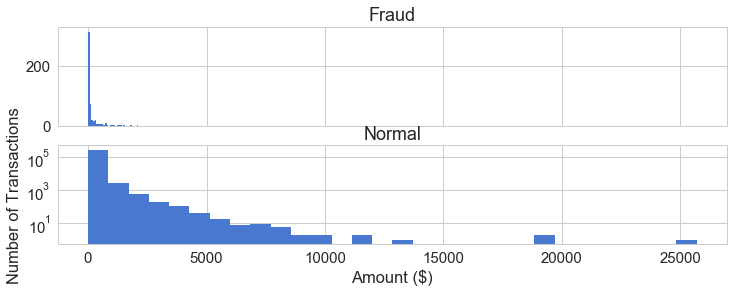

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Most transactions are small amounts, less than  100. **Fraudulent transactions have a maximum value far less than normal transactions, 2,125.87 vs $25,691.16.**

Let us create a column to identify if the transaction amount was more than maximum fraud transaction amount. This acts as the threshold of fraud transaction.

In [25]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


### Amount vs. time

Now, let's compare Time with Amount and see if we can learn anything new.

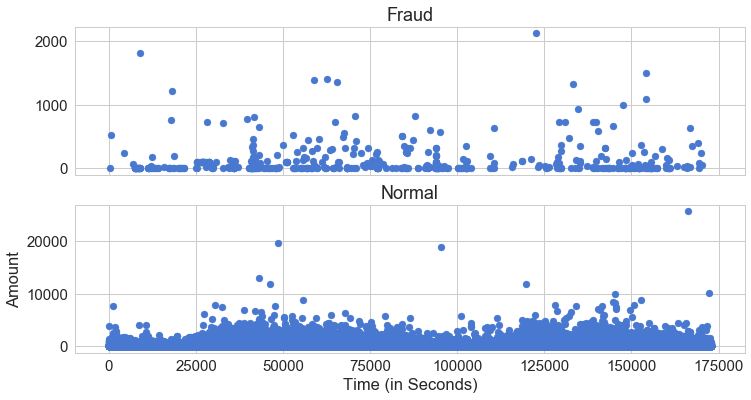

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

There is no clear trend of transaction amount vs. tiem for both normal and frauld class.

### Annomized features

Next, let's take a look at the anonymized features.

In [27]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns

C:\Users\Manjit\Anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


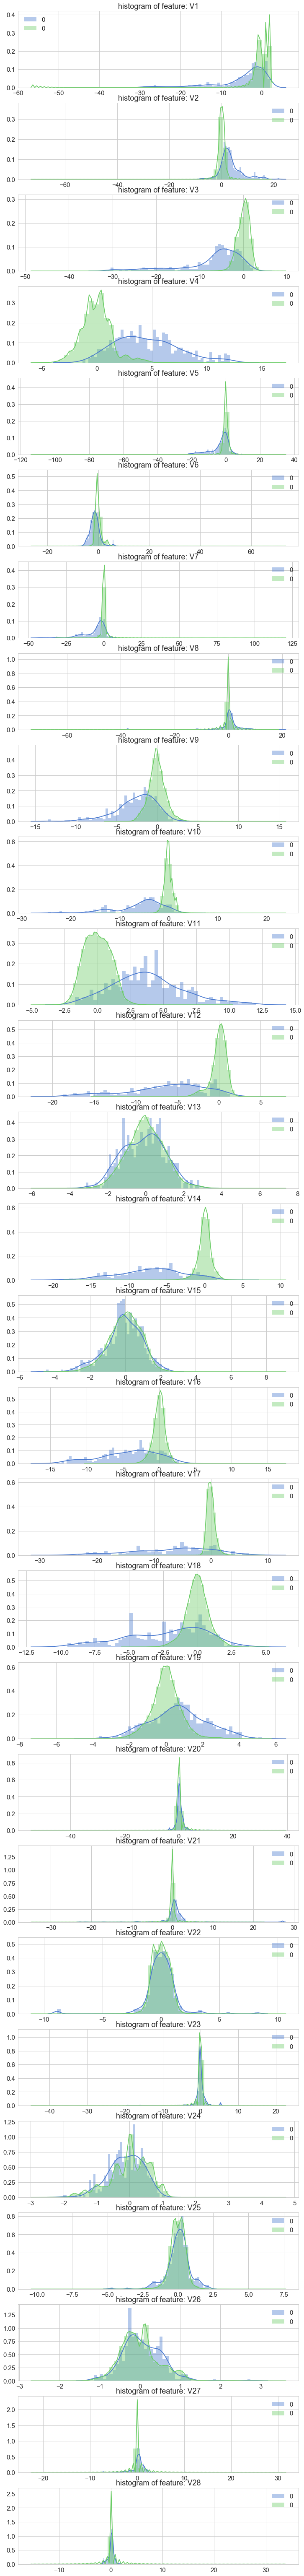

In [28]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    plt.legend(df["Class"])
    ax.set_title('histogram of feature: ' + str(cn))
    
plt.show()

Normal (orange) and fraud (blue) transaction show some differences in distribution in different annonimized features. But none of the features can completely separate the two types of transactions.   

I have decided not to exclude any feature for neural network as more features generally helps neural network accuracy.

### Prepare the dataset for neural net:

First let us create a "Normal" column to **convert single class outcome to double class outcome**.

In [29]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

**Rename 'Class' to 'Fraud'**. So here we are changing the original class label, just to remember.

In [30]:
df = df.rename(columns={'Class': 'Fraud'})

In [31]:
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


Set [max column](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html) for larger view.

In [32]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Amount_max_fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1.0


#### Setting up training and testing datasets:

Create dataframes of only Fraud and Normal transactions.

In [33]:
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

Let us take 80% of the fraud data, 80% of the normal data and concat them create the training data. Rest 20% each of normal and fraud data are joined to  create the test dataset.

Set X_train equal to 80% of the fraudulent transactions.

In [34]:
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

 Add 80% of the normal transactions to X_train.

In [35]:
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

X_test contains all the transaction not in X_train. Let us create X_test with this remaining 20% normal and fraud data.

In [36]:
X_test = df.loc[~df.index.isin(X_train.index)]

Shuffle the dataframes so that the training is done in a random order, a good practice.

In [37]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)

Let us count the Fraud column to double check and see what what we get:

In [25]:
count_X_train = pd.value_counts(X_train['Fraud'], sort = True).sort_index()
count_X_test = pd.value_counts(X_test['Fraud'], sort = True).sort_index()

print ('Count of normal and fraud on training data: \n', count_X_train)
print ('Count of normal and fraud on testing data: \n', count_X_test)

Count of normal and fraud on training data: 
 0    227452
1       394
Name: Fraud, dtype: int64
Count of normal and fraud on testing data: 
 0    56863
1       98
Name: Fraud, dtype: int64


Both traing and testing are splitted as expected with the same Fraud % (0.172). 

Add our target features to y_train and y_test, which is basically the fraud column.

In [26]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

Drop target features from X_train and X_test that is, drop both fraud and normal  columns.

In [27]:
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

Cross-check to ensure all of the training/testing dataframes are of the correct shape.

In [28]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(227846, 31)
(227846, 2)
(56961, 31)
(56961, 2)


Due to the imbalance in the data, ratio will act as an equal weighting system for our model. 
By dividing the number of transactions by those that are fraudulent, ratio will equal the value that when multiplied
by the number of fraudulent transactions will equal the number of normal transaction.   
Simply put: ratio = # of normal / # of fraud

In [29]:
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

#### Feature centering and scaling

In training and testing X-datassets, transform each feature in features so that it has a mean of 0 and standard deviation of 1.   
This helps with training the neural network.

In [30]:
#Names of all of the features in X_train.
features = X_train.columns.values

for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

We further **split the testing data into half** for validation and testing sets.  

In [31]:
split = int(len(y_test)/2)

inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_valid = X_test.as_matrix()[:split]
inputY_valid = y_test.as_matrix()[:split]
inputX_test = X_test.as_matrix()[split:]
inputY_test = y_test.as_matrix()[split:]

## 2.1 Train the Neural Net Tensorflow

A fully connected neural network is set up as below for this analysis to develop the model and predict.

* Input nodes is number of input parameters which is 31
* It is a 5 layer network with 5th layer being the output layer, all layers with sigmoid activation
* First layer is with 18 nodes (or neurons), next layers are with mode nodes using a multiplier 1.5
* pkeep is the % to keep during dropout (dropout improves NN accuracy)
* Other hyperprameters (epochs, batch size and learning rate) are defined
* Cost is defined with [reduce_sum](https://www.tensorflow.org/api_docs/python/tf/reduce_sum)
* Use [AdamOptimized](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) to minimize cost
* Define [prediction](https://www.tensorflow.org/api_docs/python/tf/equal) and accuracy and save the best weights
* Apply the best weights to predict on the test dataset


Then it is ready to create a tensorflow session to train the network on training set and test it on the validation set

In [32]:
# Number of input nodes.
input_nodes = 31

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5 

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

# Percent of nodes to keep during dropout.
pkeep = tf.placeholder(tf.float32)

In [33]:
# input
x = tf.placeholder(tf.float32, [None, input_nodes])

# layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

In [34]:
# Parameters
training_epochs = 101 # should be larger number
training_dropout = 0.9
display_step = 5 # 10 
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.005

In [35]:
# Cost function: Cross Entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

# We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Correct prediction if the most likely value (Fraud or Normal) from softmax equals the target value.
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
accuracy_summary = [] # Record accuracy values for plot
cost_summary = [] # Record cost values for plot
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0 # To keep track of the number of epochs before early stopping

# Save the best weights so that they can be used to make the final predictions
#checkpoint = "best_model.ckpt"
#saver = tf.train.Saver(max_to_keep=1)

# Initialize variables and tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs): 
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]

            sess.run([optimizer], feed_dict={x: batch_x, y_: batch_y, pkeep: training_dropout})

        # Display logs after every 10 epochs
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, y_: inputY, pkeep: training_dropout})
            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={x: inputX_valid, y_: inputY_valid, pkeep: 1})

            print ("Epoch:", epoch,
                   "Acc =", "{:.5f}".format(train_accuracy), 
                   "Cost =", "{:.5f}".format(newCost),
                   "Valid_Acc =", "{:.5f}".format(valid_accuracy), 
                   "Valid_Cost = ", "{:.5f}".format(valid_newCost))
            
            
            # Record the results of the model
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            # If the model does not improve after 15 logs, stop the training.
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
            
    print()
    print("Optimization Finished!")
    print()   

Epoch: 0 Acc = 0.97265 Cost = 89229.51562 Valid_Acc = 0.97377 Valid_Cost =  10539.15820
Epoch: 5 Acc = 0.97738 Cost = 63149.79297 Valid_Acc = 0.97784 Valid_Cost =  8358.85059
Epoch: 10 Acc = 0.97459 Cost = 51524.10938 Valid_Acc = 0.97504 Valid_Cost =  8382.67480
Epoch: 15 Acc = 0.97189 Cost = 45653.57031 Valid_Acc = 0.97163 Valid_Cost =  8654.89551
Epoch: 20 Acc = 0.97464 Cost = 37295.00391 Valid_Acc = 0.97465 Valid_Cost =  9394.89648
Epoch: 25 Acc = 0.98210 Cost = 29085.76367 Valid_Acc = 0.98195 Valid_Cost =  12025.04297
Epoch: 30 Acc = 0.98447 Cost = 20822.15820 Valid_Acc = 0.98413 Valid_Cost =  15851.33789
Epoch: 35 Acc = 0.98912 Cost = 15480.86816 Valid_Acc = 0.98904 Valid_Cost =  20909.57617
Epoch: 40 Acc = 0.98998 Cost = 10400.99414 Valid_Acc = 0.99006 Valid_Cost =  25256.47852


#### Accuracy and cost summary

Plot accuracy and cost vs. epoch.
This gives us information about how accuracy is improving with more epochs in training and validation datasets.

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary) # blue
ax1.plot(valid_accuracy_summary) # orange
ax1.set_title('Accuracy')


ax2.plot(cost_summary)
ax2.plot(valid_cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x10)')
plt.show()

Training and validation accuracy go together and saturates around 100 with more than 99% accuracy.  
Training cost goes down till upto  about 100 epochs and then it does not go down any further.  
Validation cost keeps on slowly going up and similar to training cost around 70 epochs. Beyond that, we are starting to overfit the training data.  

#### Predict on test data and accuracy

In [ ]:
#predicted = tf.argmax(y, 1)
#with tf.Session() as sess:  
    # Load the best weights
#    saver.restore(sess, checkpoint)
#   testing_predictions, testing_accuracy = sess.run([predicted, accuracy], 
#                                                     feed_dict={x: inputX_test, y_:inputY_test, pkeep: 1})
#    print("Testing Accuracy =", testing_accuracy)

**We have obtained 99.46% acuracy on the test dataset!**

## 2.2 Train Neural Net with Keras

Below I am implementing a similar NN with Keras starting from the original dataset and based on the understanding in EDA above.
Keras is high level framework (i.e. simpler codes) that actually runs on Tensorflow.
We shall evaluate NN model accuracy with Keras

In [2]:
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
#data['Normal']=1-data['Class'], instead I am converting Class to categorical
data['Amount_max_fraud'] = 1
data.loc[data.Amount <= 2125.87, 'Amount_max_fraud'] = 0
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


**Stratify Class column** in train -test split to keep the same Fraud/Normal ratio in train and test data.
I am not using any validation dataset here.

In [5]:
train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['Class'])# stratify the Class

In [6]:
count_train = pd.value_counts(train['Class'], sort = True).sort_index()
count_test = pd.value_counts(test['Class'], sort = True).sort_index()
print (count_train) 
'\n'  
print(count_test)

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


Drop target columns from model input datsets

In [7]:
X_train = train.drop(['Class'], axis = 1)
X_test = test.drop(['Class'], axis = 1)

Define target sets:

In [8]:
Y_train = train.loc[:, ['Class']]
Y_test = test.loc[:, ['Class']]

In [9]:
# Just sanity check
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(227845, 31)
(227845, 1)
(56962, 31)
(56962, 1)


Now convert Y_train and Y_test to categorical values with 2 classes.

In [10]:
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

Centering and scaling of input datasets

In [11]:
#Names of all of the features in X_train.
features = X_train.columns.values

for feature in features:
    mean, std = data[feature].mean(), data[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

Now we start Keras model building

In [12]:
# fix random seed for reproducibility
np.random.seed(2)

Set up a 5 layer network with last layer being the output layer.
First layer has input dimention as 31 (number of columns in X_train).
Activation is relu except last layer is with softmax activation
Each layer has dropout at 0.9 (90% of data used at each layer)

In [13]:
model = Sequential()
model.add(Dense(64, input_dim=31, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(2, activation='softmax'))  # With 2 outputs

Compile model using binary crossentropy loss and adam optimizer for loss.
Collect accuracy in metric.

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit the compiled model on training data.
I am using only 10 epochs to save time with batch_size of 2048.

In [15]:
epoch = 3  # Epoch should be in 1000s, 
batch_size = 2048
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch_size)

Epoch 1/3
227845/227845 [==============================] - 4s 18us/step - loss: 0.9252 - acc: 0.8762

In [16]:
score, acc = model.evaluate(X_test, Y_test)
print('Test score:', score)
print('Test accuracy:', acc)

56962/56962 [==============================] - 2s 35us/step

** We get 99.82% Accuracy!** Is it good enough for the problem? May be not. More than 10 epochs will still help.

### Training and testing accuracy and loss vs epoch:

Let us plot train and test accuracy and loss vs. epoch collcting the history by running the model again:

In [17]:
history = model.fit(X_train, Y_train, batch_size = 2048, epochs = 20, 
         validation_data = (X_test, Y_test), verbose = 2)

Train on 227845 samples, validate on 56962 samples
Epoch 1/20
 - 3s - loss: 0.0594 - acc: 0.9948 - val_loss: 0.0259 - val_acc: 0.9983
Epoch 2/20
 - 3s - loss: 0.0506 - acc: 0.9961 - val_loss: 0.0267 - val_acc: 0.9983
Epoch 3/20
 - 3s - loss: 0.0442 - acc: 0.9969 - val_loss: 0.0271 - val_acc: 0.9983
Epoch 4/20
 - 3s - loss: 0.0409 - acc: 0.9973 - val_loss: 0.0273 - val_acc: 0.9983
Epoch 5/20
 - 3s - loss: 0.0384 - acc: 0.9976 - val_loss: 0.0275 - val_acc: 0.9983
Epoch 6/20
 - 3s - loss: 0.0360 - acc: 0.9977 - val_loss: 0.0275 - val_acc: 0.9983
Epoch 7/20
 - 3s - loss: 0.0346 - acc: 0.9979 - val_loss: 0.0276 - val_acc: 0.9983
Epoch 8/20
 - 3s - loss: 0.0338 - acc: 0.9980 - val_loss: 0.0276 - val_acc: 0.9983
Epoch 9/20
 - 3s - loss: 0.0322 - acc: 0.9980 - val_loss: 0.0276 - val_acc: 0.9983
Epoch 10/20
 - 3s - loss: 0.0314 - acc: 0.9980 - val_loss: 0.0276 - val_acc: 0.9983
Epoch 11/20
 - 3s - loss: 0.0324 - acc: 0.9981 - val_loss: 0.0276 - val_acc: 0.9983
Epoch 12/20
 - 3s - loss: 0.0310 -

In [18]:
# Check the history keys
history.history.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

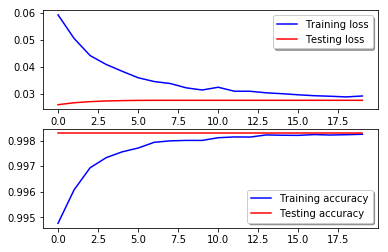

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Testing accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

Within this small number of epochs, we see that the test dataset accuracy did not clearly change.

### Confusion matrix

Let us have a look at the confusion matrix for this 2 classes.
I am using the below function to get the confusion matrix.

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

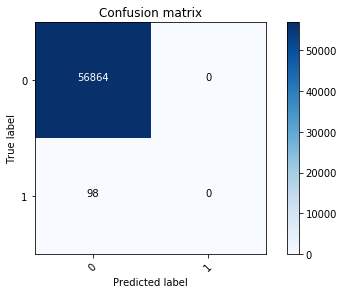

In [21]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 
plt.show()

Basically **the model did not predict the Fraud transactions correctly**. However, it did not predict any Normal transaction as Fraud.

## 2.3 Autoencoder neural network with Keras

We have found out that standard neural network is not able to capture this highly skewed Fraud data (< 0.2%).  
So I am going to redo this problem by setting up a **Autoencoder network with Keras **.  By definition, Autoencoder network is such that we **develop a model to predict the input** i.e. we are going to optimize the weights and biases (W and b) so that the model gives f(x) = x. How do we do it in NN? We squeeze the network in the middle with input and output layers being the same. The loss or error in Autoencoder is called reconstruction error which is of course minimized during training.  

Let us reload the packages.

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Using TensorFlow backend.


In [3]:
# Reload data and then drop time column and standardize Amount column
# Also we follow the already done analysis on this dataset
df = pd.read_csv("creditcard.csv")
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

Training the Autoencoder is somewhat different from what we typically do to. Here we do not specify the split betweeen Fraud and Normal transaction. We train the model on the normal transaction only (see how X_train is selected). 

In [4]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

Below I set up the AUtoencoder model. It has 4 fully connected layers after the input layer with 14, 7, 7 and 29 neurons respectively. First two layers are encoder and the last two layers are decoder. Input and output layers have same number of neurons. We are using L1 regularization.  
We can also build a different network in similar format.

In [5]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Now we compile the autoencoder model and collect the history for 10 epochs with batch size of 1000.

In [6]:
nb_epoch = 3  # Should be in thousands
batch_size = 1000

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
history = autoencoder.fit(X_train, X_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, 
                          validation_data=(X_test, X_test), verbose=1, callbacks=[checkpointer, tensorboard]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/3
227451/227451 [==============================] - 2s 7us/step - loss: 1.5096 - acc: 0.2591 - val_loss: 1.2033 - val_acc: 0.3106

The model is saved in model.h5 via Keras ModelCheckpoint. We can load the model we want.  
Now let us look at the model loss and accuracy during training and validation.

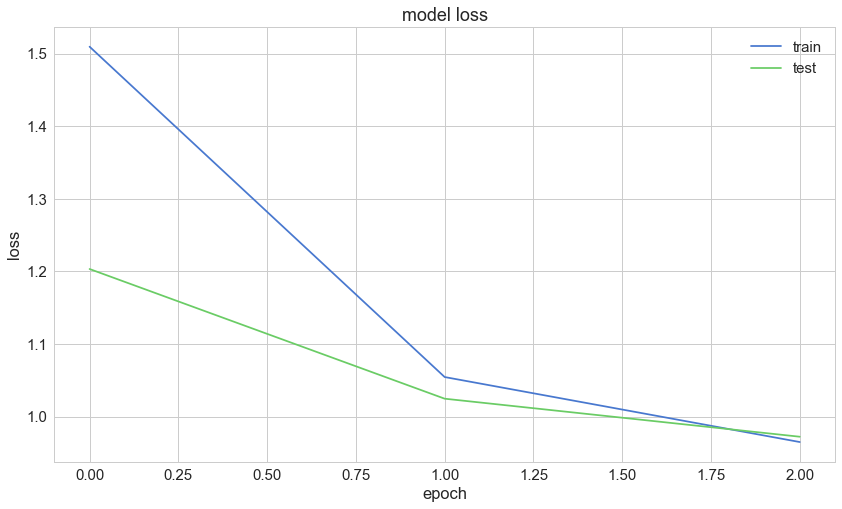

In [7]:
# Plot model loss vs. epoch

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

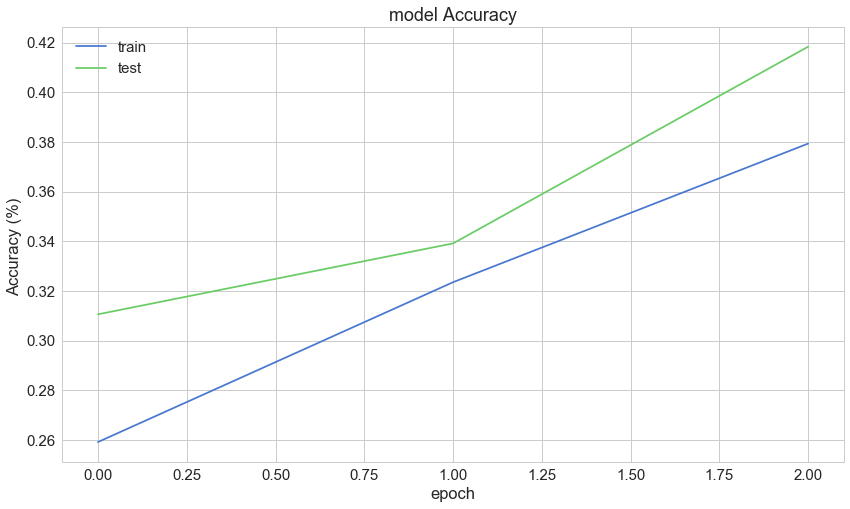

In [8]:
# Plot model Accuracy vs. epoch

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('Accuracy (%) ')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

## Prediction and reconstruction error with Autoencoder

Let's do prediction on X_test based on the model and then look at the error (mean squared error) which is called the reconstruction error here.

In [9]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.931250,0.001720
std,3.725330,0.041443
min,0.111149,0.000000
25%,0.339443,0.000000
50%,0.522320,0.000000
75%,0.799709,0.000000
max,260.326703,1.000000


* Although true class is either 0 or 1, reconstruction error has much larger range. Let us look at this reconstruction error distribution for both Normal and Fraud classes in the test dataset.

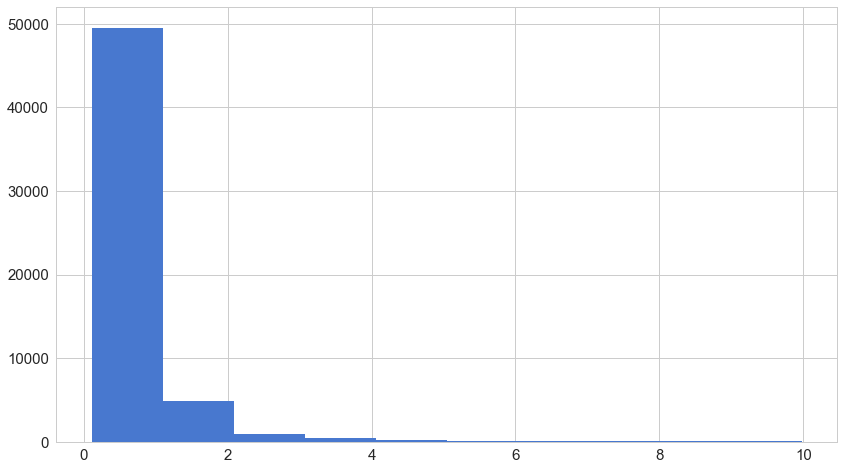

In [10]:
# Reconstruction error in normal class

fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

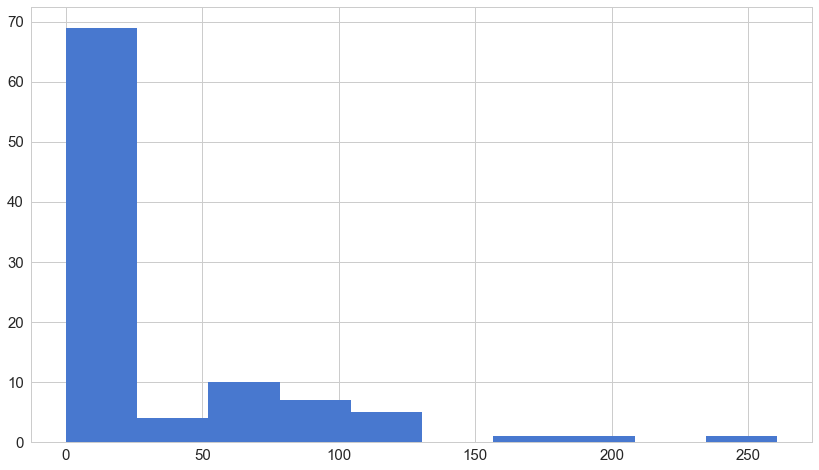

In [11]:
# Reconstruction error in Fraud class

fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

We see that reconstruction error has larger tail (worse) in case of Fraud class.

## Confusion Matrix with Autoencoder

In order to predict the class of a transaction, we estimte the reconstruction error for that transaction. **If the predicted error is larger than a threshold** it is marked as Fraud and otherwise Normal. 

In [12]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

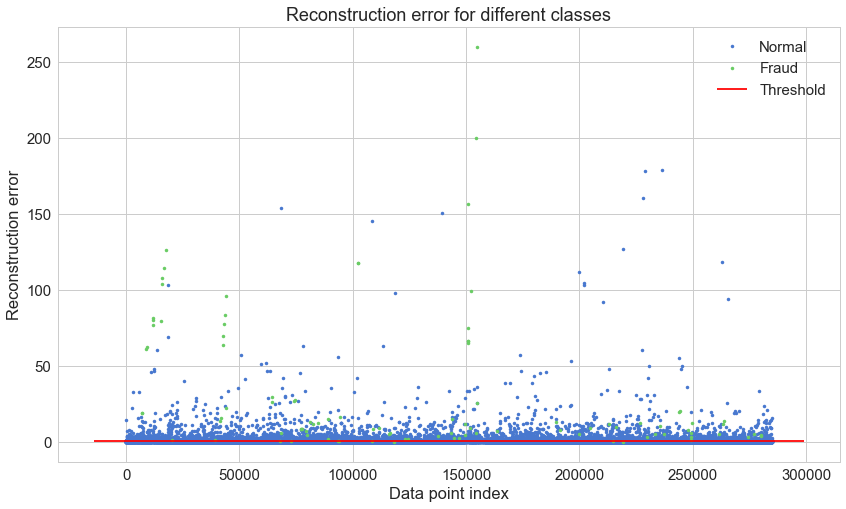

In [13]:
# Prediction with a threshold

threshold = 1

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

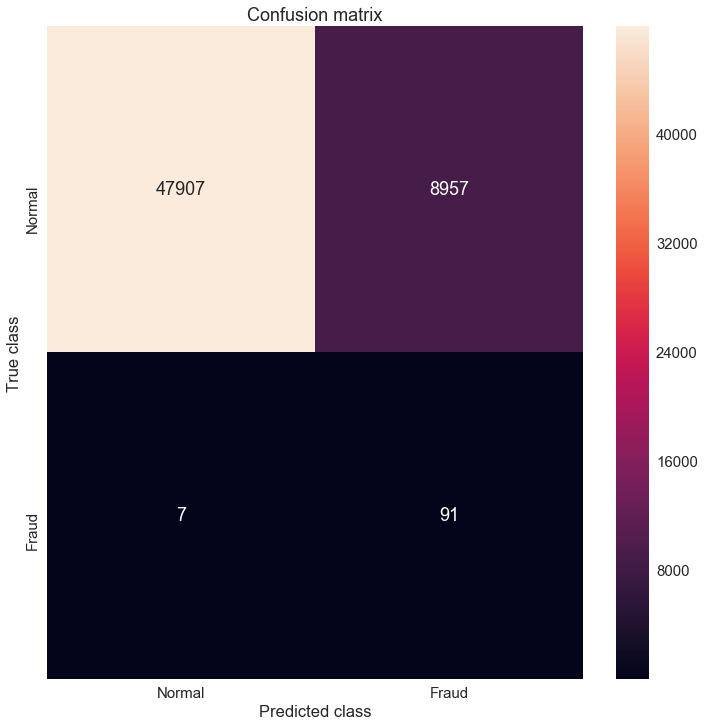

In [14]:
# Confusion matrix

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

** Autoencoder model is able to detect Fraud transaction in this highly skewed data!**  
Although the model catches most of Fraud transaction, it also classifies lot of normal transaction (12%!) as Fraud. Larger threshold will reduce misclassification of the Normal class but it will also reduce detection of the Fraud class.

## 3. Visualizing the Data with t-SNE

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a technique ([wiki page](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)) for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It was developed by Geoffrey Hinton and Laurens van der Maaten.  

In this example, first we sue t-SNE on a original data sample (since the data is big and takes time to process) and then on the data used for training. If we see aclear contrast between fraud and normal in the scatter plot, then it indicates that the neural network and feature engineering works well for this prediction. 

In [15]:
#reload the original dataset
tsne_data = pd.read_csv("creditcard.csv")

In [16]:
#Set df2 equal to all of the fraulent and 10,000 normal transactions.
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

In [17]:
#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.iloc[:,-1].values

In [18]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

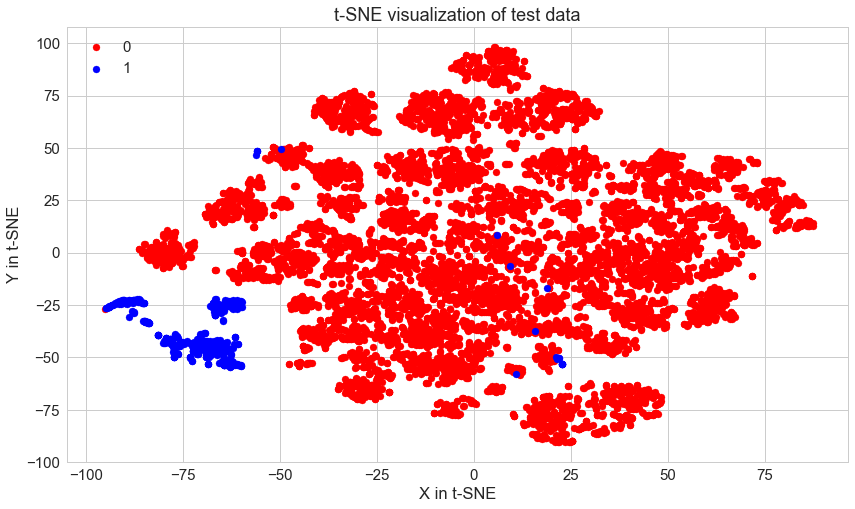

In [19]:
#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

Most of the fraudulent transactions are well separated in the original dataset sample in this t-SNE plot, while some are mixed within the rest of the data.  
Just to note, this visualizayion may change from sample to sample and it may not be **exactly** representative for the whole dataset.
Now, let us look at t-SNE of the training dataset that was used in this analysis. It is expected to show good separation like the above one.  

In [38]:
#Set df_used to the fraudulent transactions' dataset.
df_used = Fraud

#Add 10,000 normal transactions to df_used.
df_used = pd.concat([df_used, Normal.sample(n = 10000)], axis = 0)

In [39]:
#Scale features to improve the training ability of TSNE.
df_used_std = standard_scaler.fit_transform(df_used)

#Set y_used equal to the target values.
y_used = df_used.iloc[:,-1].values

In [40]:
x_test_2d_used = tsne.fit_transform(df_used_std)

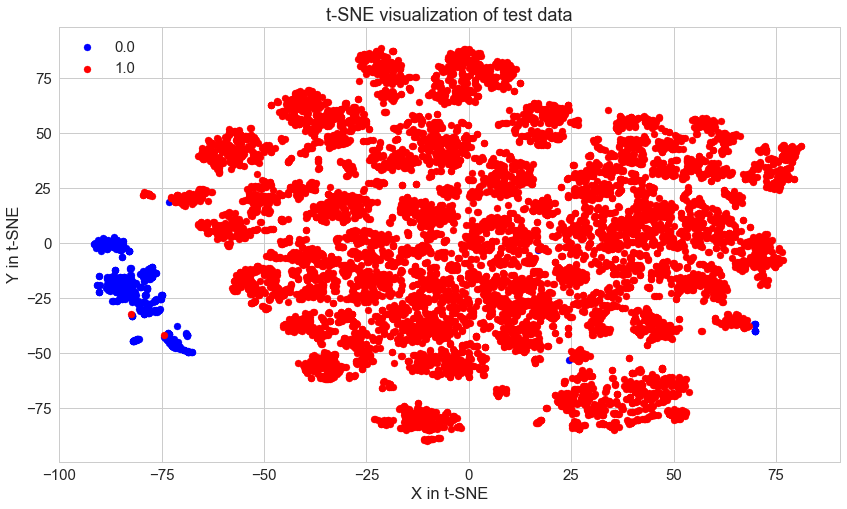

In [41]:
color_map = {1:'red', 0:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_used)):
    plt.scatter(x=x_test_2d_used[y_used==cl,0], 
                y=x_test_2d_used[y_used==cl,1], 
                c=color_map[idx], 
                label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

Here we see that fraud and normal transactions are almost clearly separated. This indicates that we should ne able to develop a model based on feature engineering based on traning subset and predict on the testing subset.

### Conclusion

* EDA did not show clear separation of fraud and normal transaction captured by any single parameter
* Fraud transactions are typically small. On a crude term, transaction with values more than maximum of  fraud transaction can safely be assumed as normal
* Both Tensorflow and Keras model built on the creditcard dataset showed very high accuracies (99.46% & 99.82%) however, failed to capture the Fraud transaction in this highly skewed data
* Autoencoder model with a small threshold for reconstruction error can capture most of Fraud transaction however, it also significantly misclassify Normal transaction as Fraud.
* t-SNE plot showed good separation between the normal and fraudalant transaction in the scatterplot suggesting prediction model to show good accuracy in model developed training and testing within the dataset.

### How to improve on fraud detection?

* Undersampling of normal class data to match fraud sample size
* Otherway round, simulate (with SMOTE technique) more fraud data
* More fraud data is always better, particularly for NN
* Train a larger or different Autoencoder or other NN

### Reference:

* Thanks to [tensoflow Kaggle notebook by Currie32](https://www.kaggle.com/currie32/predicting-fraud-with-tensorflow) that I directly took help from to exercise this analysis in implementing Tensorflow
* Documentation in [Keras model](https://keras.io/getting-started/sequential-model-guide/)
* Great Medium blog about applying NN [Autoencoder on Fraud Detection](https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd)
* About under and oversampling in [Quora](https://www.quora.com/Is-it-a-good-idea-to-undersample-or-oversample-a-heavily-imbalanced-dataset-from-a-statistical-perspective) 